# PARTIE I

## Extraire les tableaux de classement des matchs de football puis les nettoyer

In [1]:
import pandas as pd
import pickle
from string import ascii_uppercase as alphabet

In [2]:
# extraire les tables du site 
all_tables = pd.read_html('https://web.archive.org/web/20221115040351/https://en.wikipedia.org/wiki/2022_FIFA_World_Cup')

In [3]:
# finding tables in group stage
all_tables[12]
all_tables[19]
all_tables[26]
all_tables[61]

,Pos,Teamvte,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,1,Portugal,0,0,0,0,0,0,0,0,Advance to knockout stage
1,2,Ghana,0,0,0,0,0,0,0,0,Advance to knockout stage
2,3,Uruguay,0,0,0,0,0,0,0,0,NaN
3,4,South Korea,0,0,0,0,0,0,0,0,NaN


### data cleaning des tableaux de classement

In [4]:
#Il n'à que le groupe 1 que la colonne Team est bien nommée faut le changer 
all_tables[61].columns[1]

'Teamvte'

In [5]:
#Permet de relier chaque chiffre à la lettre du groupe correspondant 
alphabet

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [6]:
# for lettre, i in zip(alphabet,range(12, 68, 7)):
#     print(lettre, i)

In [7]:
#Illustration
all_tables = pd.read_html('https://web.archive.org/web/20221115040351/https://en.wikipedia.org/wiki/2022_FIFA_World_Cup')

dic_table = {}
for lettre, i in zip(alphabet,range(12, 68, 7)):
    df = all_tables[i]
    df.rename(columns={df.columns[1]:'Team'}, inplace=True)
    df.pop('Qualification')
    dic_table[f'Group {lettre }'] = df

In [8]:
dic_table.keys()

dict_keys(['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H'])

In [9]:
dic_table['Group F']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Belgium,0,0,0,0,0,0,0,0
1,2,Canada,0,0,0,0,0,0,0,0
2,3,Morocco,0,0,0,0,0,0,0,0
3,4,Croatia,0,0,0,0,0,0,0,0


### Sauvegarde du resultat obtenu dans un disctionnaire

In [10]:
# Sauvegarder les resultats en l'occurence le dictionnaire
with open('dic_table', 'wb') as output:
    pickle.dump(dic_table, output)

# PARTIE II

## Extraire les resultats des matchs de coupe du monde de 1930 à 2022 avec BeautifulSoup

In [11]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# data to scraper -> 1930-2018
years = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974,
         1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014,
         2018, 2022]


In [12]:
#Extraction de données sur le site 
# !pip install lxml
# web = f'https://en.wikipedia.org/wiki/2014_FIFA_World_Cup'
# response = requests.get(web)
# content = response.text
# soup = BeautifulSoup(content, 'lxml')

# #Trouver toutes les div dont la classe est footballbox
# matches = soup.find_all('div', class_='footballbox')

In [13]:
#Contient toutes les rencontre y compris les differentes scores
# matches

In [14]:
# home = []
# score = []
# away = []

# #Afficher les resultats et mettre dans une liste
# for match in matches:
#     home.append(match.find('th', class_='fhome').get_text())
#     score.append(match.find('th', class_='fscore').get_text())
#     away.append(match.find('th', class_='faway').get_text())

# #Transformer la liste obtenue en dataframe
# dict_football = {'home': home, 'score': score, 'away': away}
# df_football = pd.DataFrame(dict_football)
# #Preciser l'annee 
# df_football['year'] = '2014'

In [15]:
#Fonction globale 
def get_matches(year):
    web = f'https://en.wikipedia.org/wiki/{year}_FIFA_World_Cup'
    response = requests.get(web)
    content = response.text
    soup = BeautifulSoup(content, 'lxml')
    matches = soup.find_all('div', class_='footballbox')

    home = []
    score = []
    away = []

    for match in matches:
        home.append(match.find('th', class_='fhome').get_text())
        score.append(match.find('th', class_='fscore').get_text())
        away.append(match.find('th', class_='faway').get_text())

    dict_football = {'home': home, 'score': score, 'away': away}
    df_football = pd.DataFrame(dict_football)
    df_football['year'] = year
    return df_football

In [16]:
#Obtenir les resultats de la coupe du monde 2022
get_matches('2022')

,home,score,away,year
0,Qatar,0–2,Ecuador,2022
1,Senegal,0–2,Netherlands,2022
2,Qatar,1–3,Senegal,2022
3,Netherlands,1–1,Ecuador,2022
4,Ecuador,1–2,Senegal,2022
...,...,...,...,...
59,England,1–2,France,2022
60,Argentina,3–0,Croatia,2022
61,France,2–0,Morocco,2022
62,Croatia,2–1,Morocco,2022


In [17]:
# Fonction pour recuperer tous les resultats pour toutes les années

fifa = [get_matches(year) for year in years]
df_fifa = pd.concat(fifa, ignore_index=True)
df_fifa.to_csv("fifa_worldcup_historique_data.csv", index=False)


In [18]:
data_cdm = pd.read_csv('fifa_worldcup_historique_data.csv')
data_cdm.tail()

,home,score,away,year
924,England,1–2,France,2022
925,Argentina,3–0,Croatia,2022
926,France,2–0,Morocco,2022
927,Croatia,2–1,Morocco,2022
928,Argentina,3–3 (a.e.t.),France,2022


In [19]:
#Lorsqu'on observe une difference de classe pour une page particuliere on block les donnees vers cette page 
# fixture pour l'annee 2022 par exemple

df_fixture = get_matches(2022)

#df_fixture.to_csv('fifa_worldcup_fixture.csv', index=False)

# PARTIE III

## Data cleaning d'un ensemble de données dans le football

In [20]:
df_historical_data = pd.read_csv('fifa_worldcup_matches.csv')
df_fixture = pd.read_csv('fifa_worldcup_fixture.csv')
df_missing_data = pd.read_csv('fifa_worldcup_missing_data.csv')

### Cleaning df_fixture

In [21]:
#Les donnees de 2022 avec des données incomplet
df_fixture

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
...,...,...,...,...
59,Winners Match 51,Match 59,Winners Match 52,2022
60,Winners Match 57,Match 61,Winners Match 58,2022
61,Winners Match 59,Match 62,Winners Match 60,2022
62,Losers Match 61,Match 63,Losers Match 62,2022


In [22]:
#Supprimer les espaces vides
df_fixture['home'] = df_fixture['home'].str.strip()
df_fixture['away'] = df_fixture['away'].str.strip()

In [23]:
df_fixture.head()

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022


### Cleaning df_missing_data

In [24]:
#Les donnees avec des valeurs manquantes
df_missing_data

,home,score,away,year
0,Mexico,0–0,Soviet Union,1970
1,Belgium,3–0,El Salvador,1970
2,Soviet Union,4–1,Belgium,1970
3,Mexico,4–0,El Salvador,1970
4,Soviet Union,2–0,El Salvador,1970
...,...,...,...,...
503,Spain,0–1,Switzerland,2010
504,Chile,1–0,Switzerland,2010
505,Spain,2–0,Honduras,2010
506,Chile,1–2,Spain,2010


In [25]:
#Valeurs manquantes
df_missing_data[df_missing_data['home'].isnull()]

,home,score,away,year
396,NaN,NaN,NaN,2010
397,NaN,NaN,NaN,2010
398,NaN,NaN,NaN,2010
399,NaN,NaN,NaN,2010
400,NaN,NaN,NaN,2010
...,...,...,...,...
455,NaN,NaN,NaN,2010
456,NaN,NaN,NaN,2010
457,NaN,NaN,NaN,2010
458,NaN,NaN,NaN,2010


In [26]:
#Supprimer les valeurs manquantes
df_missing_data.dropna(inplace=True)

In [27]:
#Verification
df_missing_data[df_missing_data['home'].isnull()]

,home,score,away,year


In [28]:
#Ajouter df_missing_data avec les données de df_historical_data
df_historical_data = pd.concat([df_historical_data, df_missing_data], ignore_index=True)

In [29]:
#Supprimer les lignes dupliquées
df_historical_data.drop_duplicates(inplace=True)

In [30]:
#Trier les données par Année
df_historical_data.sort_values('year', inplace=True)
df_historical_data

,home,score,away,year
0,France,4–1,Mexico,1930
17,Uruguay,4–2,Argentina,1930
16,Uruguay,6–1,Yugoslavia,1930
15,Argentina,6–1,United States,1930
14,Paraguay,1–0,Belgium,1930
...,...,...,...,...
419,Brazil,2–0,Costa Rica,2018
420,Serbia,1–2,Switzerland,2018
421,Serbia,0–2,Brazil,2018
408,France,1–0,Peru,2018


### Cleaning df_historical_data

In [31]:
#Donnees historique de 1930 à 2018
df_historical_data

,home,score,away,year
0,France,4–1,Mexico,1930
17,Uruguay,4–2,Argentina,1930
16,Uruguay,6–1,Yugoslavia,1930
15,Argentina,6–1,United States,1930
14,Paraguay,1–0,Belgium,1930
...,...,...,...,...
419,Brazil,2–0,Costa Rica,2018
420,Serbia,1–2,Switzerland,2018
421,Serbia,0–2,Brazil,2018
408,France,1–0,Peru,2018


In [32]:
#Toutes les informations sur le dataFrame
df_historical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 450
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   home    901 non-null    object
 1   score   901 non-null    object
 2   away    901 non-null    object
 3   year    901 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 35.2+ KB


In [33]:
#pas de valeurs manquantes
df_historical_data.isnull().sum()

home     0
score    0
away     0
year     0
dtype: int64

In [34]:
#Pas de ligne dupliqué
df_historical_data[df_historical_data.duplicated()]

,home,score,away,year


In [35]:
df_historical_data['score'].value_counts()

score
1–0             97
2–1             92
0–1             68
1–1             68
2–0             66
                ..
7–2              1
4–3 (a.e.t.)     1
8–3              1
7–3              1
4–3              1
Name: count, Length: 64, dtype: int64

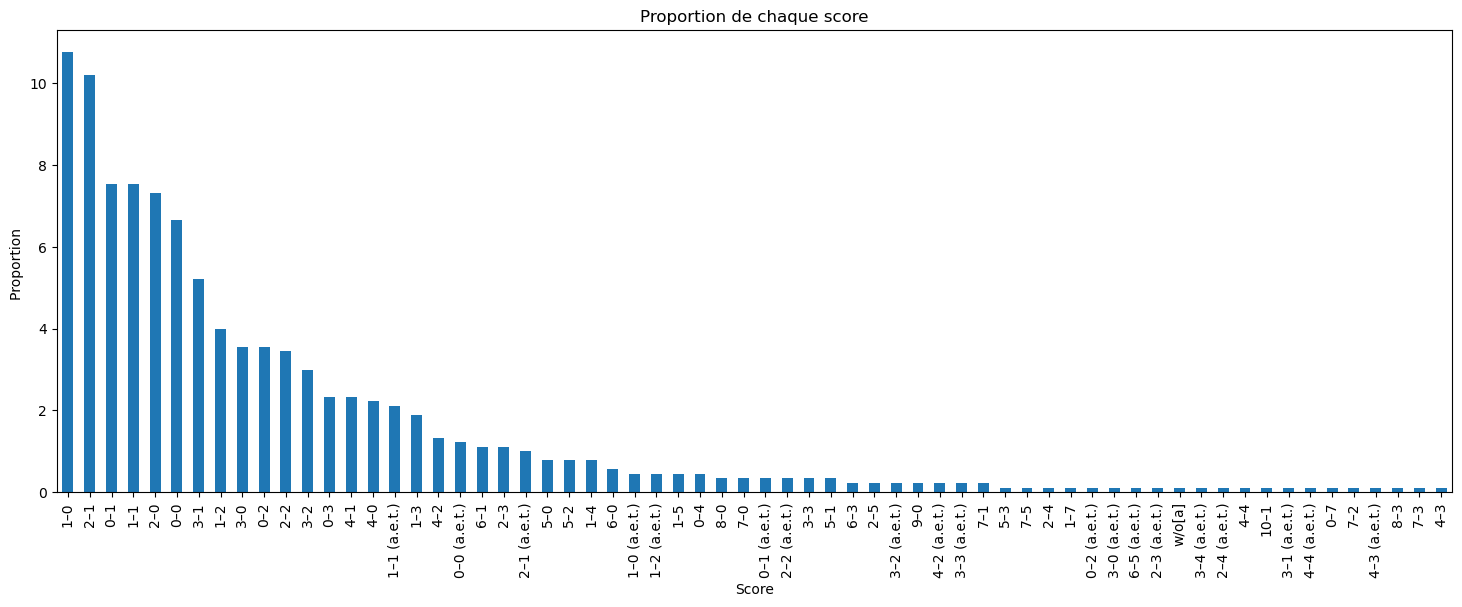

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculer les valeurs de comptage et les proportions
value_counts = df_historical_data['score'].value_counts()
proportions = (value_counts / value_counts.sum()) * 100

# Créer le diagramme à bande
plt.figure(figsize=(18, 6))
proportions.plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Proportion ')
plt.title('Proportion de chaque score')
plt.show()

In [37]:
#Il y a un probleme au niveau de ce match on a pas de score 
df_historical_data[df_historical_data['score']=='w/o[a]'] 

,home,score,away,year
37,Sweden,w/o[a],Austria,1938


In [38]:
#Supprimer la ligne correspondante 
delete_index = df_historical_data[df_historical_data['home'].str.contains('Sweden') &
                                  df_historical_data['away'].str.contains('Austria')].index

df_historical_data.drop(index=delete_index, inplace=True)

In [39]:
#Verification
df_historical_data[df_historical_data['score']=='w/o[a]'] 

,home,score,away,year


In [40]:
# datacleanning score columns

# Cette instruction remplace tous les caractères dans la colonne 'score' qui ne sont pas des chiffres (0-9)
# ou le caractère spécial "–" (un tiret différent de "-") par des chaînes vides. Autrement dit, 
# elle élimine ces caractères non numériques.

df_historical_data['score'] = df_historical_data['score'].str.replace('[^\d–]', '', regex=True)

In [41]:
# datacleanning home/away columns
df_historical_data['home'] = df_historical_data['home'].str.strip() # supprimer les espaces vides
df_historical_data['away'] = df_historical_data['away'].str.strip()

In [42]:
# division des colonnes de score en buts à domicile et buts à l'extérieur et abandon de la colonne de score

# Séparer les valeurs de la colonne 'score' en deux nouvelles colonnes 'HomeGoals' et 'AwayGoals' 
# en utilisant le caractère "–" comme séparateur.
# Supprimer la colonne 'score' d'origine du DataFrame.

df_historical_data[['HomeGoals', 'AwayGoals']] = df_historical_data['score'].str.split('–', expand=True)
df_historical_data.drop('score', axis=1, inplace=True)

In [43]:
# renomer les colonnes 
df_historical_data.rename(columns={'home': 'HomeTeam', 'away': 'AwayTeam', 
                                   'year':'Year'}, inplace=True)
# changer les types de donnees 
df_historical_data = df_historical_data.astype({'HomeGoals': int, 'AwayGoals':int, 'Year': int})

In [44]:
df_historical_data.head()

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals
0,France,Mexico,1930,4,1
17,Uruguay,Argentina,1930,4,2
16,Uruguay,Yugoslavia,1930,6,1
15,Argentina,United States,1930,6,1
14,Paraguay,Belgium,1930,1,0


In [45]:
# crée la colonne "totalgoals"
df_historical_data['TotalGoals'] = df_historical_data['HomeGoals'] + df_historical_data['AwayGoals']
df_historical_data

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
17,Uruguay,Argentina,1930,4,2,6
16,Uruguay,Yugoslavia,1930,6,1,7
15,Argentina,United States,1930,6,1,7
14,Paraguay,Belgium,1930,1,0,1
...,...,...,...,...,...,...
419,Brazil,Costa Rica,2018,2,0,2
420,Serbia,Switzerland,2018,1,2,3
421,Serbia,Brazil,2018,0,2,2
408,France,Peru,2018,1,0,1


### Exporter les Données netoyeés

In [46]:
df_historical_data.to_csv('clean_fifa_worldcup_matches.csv',index=False)
df_fixture.to_csv('clean_fifa_worldcup_fixture.csv',index=False)

## Verification 

In [47]:
#Nombre de match par Annee de competition
data1 = df_historical_data.groupby("Year")['Year'].count()
data1

Year
1930    18
1934    17
1938    18
1950    22
1954    26
1958    35
1962    32
1966    32
1970    32
1974    38
1978    38
1982    52
1986    52
1990    52
1994    52
1998    64
2002    64
2006    64
2010    64
2014    64
2018    64
Name: Year, dtype: int64

Text(0, 0.5, 'Nombre de match')

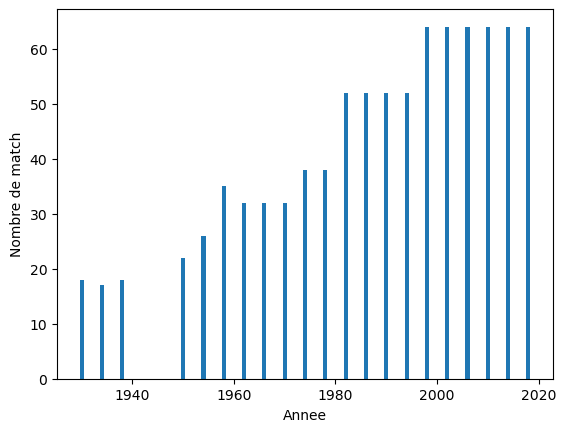

In [48]:
years = [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974,
         1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014,
         2018]
plt.bar(years, data1)
plt.xlabel('Annee')
plt.ylabel('Nombre de match')

In [49]:
# verification de la collecte de données
df_historical_data[df_historical_data['HomeTeam'].str.contains('Turkey')]
df_historical_data[df_historical_data['AwayTeam'].str.contains('Turkey')]

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
80,West Germany,Turkey,1954,4,1,5
84,West Germany,Turkey,1954,7,2,9
769,Brazil,Turkey,2002,2,1,3
287,Japan,Turkey,2002,0,1,1
292,Senegal,Turkey,2002,0,1,1
294,Brazil,Turkey,2002,1,0,1
295,South Korea,Turkey,2002,2,3,5
772,Costa Rica,Turkey,2002,1,1,2


# PARTIE IV PREDICTION

In [50]:
import pandas as pd
import pickle
from scipy.stats import poisson

In [51]:
dict_table = pickle.load(open('dict_table','rb')) #import des tableaux de classement de la partie 1
df_historical_data = pd.read_csv('clean_fifa_worldcup_matches.csv')#Nos données historique nétoyées
df_fixture = pd.read_csv('clean_fifa_worldcup_fixture.csv')#Nos données de 2022

In [52]:
df_historical_data

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
1,Uruguay,Argentina,1930,4,2,6
2,Uruguay,Yugoslavia,1930,6,1,7
3,Argentina,United States,1930,6,1,7
4,Paraguay,Belgium,1930,1,0,1
...,...,...,...,...,...,...
895,Brazil,Costa Rica,2018,2,0,2
896,Serbia,Switzerland,2018,1,2,3
897,Serbia,Brazil,2018,0,2,2
898,France,Peru,2018,1,0,1


## Calculer la moyenne de but par equipe

In [53]:
#Cree deux dataframe equipe à domicile ,Equipe à l'exterieur
df_home = df_historical_data[['HomeTeam', 'HomeGoals', 'AwayGoals']]
df_away = df_historical_data[['AwayTeam', 'HomeGoals', 'AwayGoals']]

In [54]:
#renomer les tables
df_home = df_home.rename(columns={'HomeTeam':'Team', 'HomeGoals': 'GoalsScored', 'AwayGoals': 'GoalsConceded'})
df_away = df_away.rename(columns={'AwayTeam':'Team', 'HomeGoals': 'GoalsConceded', 'AwayGoals': 'GoalsScored'})

In [55]:
#Calcule de la moyenne des buts par equipe
df_team_strength = pd.concat([df_home, df_away], ignore_index=True).groupby(['Team']).mean()
df_team_strength

,GoalsScored,GoalsConceded
Team,,
Algeria,1.000000,1.461538
Angola,0.333333,0.666667
Argentina,1.691358,1.148148
Australia,0.812500,1.937500
Austria,1.482759,1.620690
...,...,...
Uruguay,1.553571,1.321429
Wales,0.800000,0.800000
West Germany,2.112903,1.241935


In [56]:
#les 5 equipes ayant encaisser le plus de but en moyenne
df_team_strength.sort_values('GoalsConceded', ascending=False).head()

,GoalsScored,GoalsConceded
Team,,
Dutch East Indies,0.000000,6.000000
Zaire,0.000000,4.666667
Haiti,0.666667,4.666667
Cuba,1.666667,4.000000
United Arab Emirates,0.666667,3.666667


In [57]:
##les 5 equipes ayant marquer le plus de but en moyenne
df_team_strength.sort_values('GoalsScored', ascending=False).head()

,GoalsScored,GoalsConceded
Team,,
Hungary,2.718750,1.781250
West Germany,2.112903,1.241935
Brazil,2.100917,0.963303
Germany,2.021277,1.021277
Turkey,2.000000,1.700000


In [58]:
#Visualisation
top_5_goals_conceded = df_team_strength.nlargest(5, 'GoalsConceded')
top_5_goals_scored = df_team_strength.nlargest(5, 'GoalsScored')

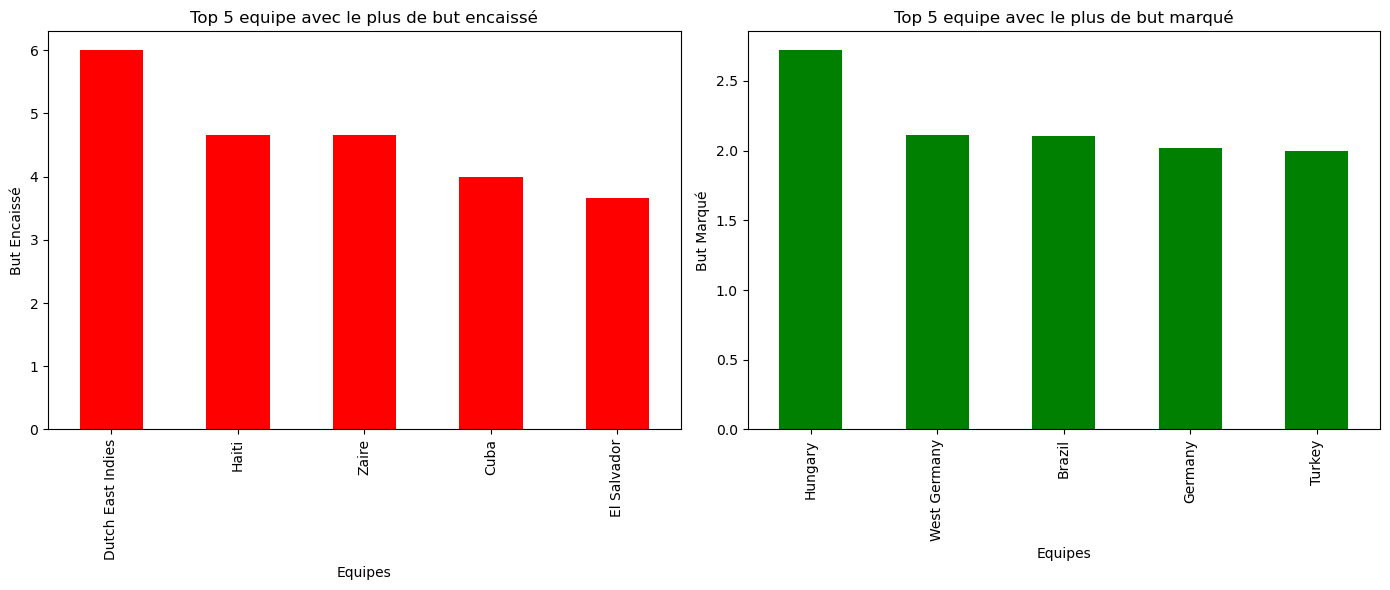

In [59]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_5_goals_conceded['GoalsConceded'].plot(kind='bar', color='red')
plt.title('Top 5 equipe avec le plus de but encaissé')
plt.xlabel('Equipes')
plt.ylabel('But Encaissé')

plt.subplot(1, 2, 2)
top_5_goals_scored['GoalsScored'].plot(kind='bar', color='green')
plt.title('Top 5 equipe avec le plus de but marqué')
plt.xlabel('Equipes')
plt.ylabel('But Marqué')

plt.tight_layout()
plt.show()

## Distribution de poisson 

La distribution de Poisson est une distribution de probabilité discrète qui décrit le nombre d'événements se produisant dans un intervalle de temps fixe ou une région d'opportunité.

#### But : événement susceptible de se produire au cours des 90 minutes d'un match de football 

#### Distribution de Poisson : Hypothèses
    
##### 1. Le nombre d'événements peut être compté
    le nombre de buts marqués par une équipe dans un match, le nombre de tirs au but, le nombre de fautes commises, etc.
    
##### 2. Les événements sont indépendants
    le fait qu'une équipe marque un but n'affecte pas directement la probabilité qu'elle marque un autre but.
    
##### 3. La vitesse à laquelle les événements se produisent est constante
    la probabilité qu'une équipe marque un but reste constante tout au long du match.

##### 4. Deux événements ne peuvent pas se produire exactement au même moment.
    Dans le football, il est peu probable que deux événements distincts (comme deux buts) se produisent exactement au même    moment, donc cette hypothèse est généralement respectée.
    


## Function prediction des points par equipe

In [74]:
def predict_points(home, away):
    if home in df_team_strength.index and away in df_team_strength.index:
        # lamb_home est le taux de buts attendu pour l'équipe à domicile, calculé comme le produit des buts marqués par l'équipe à domicile et des buts encaissés par l'équipe à l'extérieur.
        # lamb_away est le taux de buts attendu pour l'équipe à l'extérieur, calculé de manière similaire.
        lamb_home = df_team_strength.at[home,'GoalsScored'] * df_team_strength.at[away,'GoalsConceded']
        lamb_away = df_team_strength.at[away,'GoalsScored'] * df_team_strength.at[home,'GoalsConceded']
        
#        Calcul des probabilités de chaque résultat possible (de 0 à 10 buts pour chaque équipe) :
        prob_home, prob_away, prob_draw = 0, 0, 0
        for x in range(0,11): #number de but pour l'equipe à domicile
            for y in range(0, 11): #number de but pour l'equipe à l'extérieur
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
                    
#       Les points attendus pour l'équipe à domicile sont calculés en multipliant la probabilité de victoire à domicile par 3
#       (points pour une victoire) et en ajoutant la probabilité de match nul (1 point pour un match nul).
#       Les points attendus pour l'équipe à l'extérieur sont calculés de la même manière.
        
        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        
        # Arrondir les résultats à deux chiffres après la virgule
        points_home = round(points_home, 2)
        points_away = round(points_away, 2)
        prob_home = round(prob_home, 2)
        prob_draw = round(prob_draw, 2)
        prob_away = round(prob_away, 2)
        
        return (f'point de {home} est: {points_home}' ,f'point de {away} est: {points_away}', f'Probabilité de victoire de {home} est: {prob_home}',f'Probabilité de match nul est: {prob_draw}', f'Probabilité de victoire de {away} est: {prob_away}')
    else:
        return (0, 0, 0, 0, 0) 

In [107]:
# def predict_points(home, away):
#     if home in df_team_strength.index and away in df_team_strength.index:
#         # goals_scored * goals_conceded
#         lamb_home = df_team_strength.at[home,'GoalsScored'] * df_team_strength.at[away,'GoalsConceded']
#         lamb_away = df_team_strength.at[away,'GoalsScored'] * df_team_strength.at[home,'GoalsConceded']
#         prob_home, prob_away, prob_draw = 0, 0, 0
#         for x in range(0,11): #number of goals home team
#             for y in range(0, 11): #number of goals away team
#                 p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
#                 if x == y:
#                     prob_draw += p
#                 elif x > y:
#                     prob_home += p
#                 else:
#                     prob_away += p
        
#         points_home = 3 * prob_home + prob_draw
#         points_away = 3 * prob_away + prob_draw
#         return (points_home, points_away)
#     else:
#         return (0, 0)

### Teste de la fonction

In [75]:
print(predict_points('England', 'United States'))

('point de England est: 2.24', 'point de United States est: 0.59', 'Probabilité de victoire de England est: 0.69', 'Probabilité de match nul est: 0.17', 'Probabilité de victoire de United States est: 0.14')


In [76]:
#Sur 3 points argentine peut obtenir 2.31 et mexico 0.54 c'est à dire l'argentine à plus de chance d'obtenir les 3 points
predict_points('Argentina', 'Mexico')

('point de Argentina est: 2.31',
 'point de Mexico est: 0.54',
 'Probabilité de victoire de Argentina est: 0.72',
 'Probabilité de match nul est: 0.15',
 'Probabilité de victoire de Mexico est: 0.13')

In [62]:
#Interpretation
# Points attendus pour l'équipe à domicile (England) : 2.2356
# Cela signifie que, en moyenne, England peut s'attendre à obtenir environ 2.24 points dans un match contre United States.

# Points attendus pour l'équipe à l'extérieur (United States) : 0.5922
# Cela signifie que, en moyenne, United States peut s'attendre à obtenir environ 0.59 points dans un match contre England.

# Si les points attendus sont supérieurs à 2, cela suggère que l'équipe à domicile a une forte probabilité de gagner le match.

# Si les points attendus sont inférieurs à 1, cela suggère que l'équipe à l'extérieur a une faible probabilité de gagner le match.

# La probabilité de match nul est intégrée dans les points attendus (une partie des points de l'équipe à domicile et de l'équipe à l'extérieur provient des matchs nuls).

# Disons que les probabilités calculées par la fonction sont les suivantes (exemple hypothétique) :

# Probabilité de victoire d'England (prob_home) : 0.65
# Probabilité de match nul (prob_draw) : 0.21
# Probabilité de victoire des United States (prob_away) : 0.14


In [81]:
predict_points('Qatar','Ecuador')

# Le résultat (0, 0, 0, 0, 0) de l'appel predict_points('Qatar (H)', 'Ecuador')
# signifie que la fonction n'a pas pu trouver les équipes 'Qatar (H)' et/ou 'Ecuador' 
# dans l'index du DataFrame df_team_strength
#Dans notre exemple effectivement il n'y a pas de donnees historique sur le Quatar 

(0, 0, 0, 0, 0)

In [87]:
#Liste des equipes
df_team_strength.index

Index(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Czech Republic', 'Czechoslovakia', 'Denmark', 'Dutch East Indies',
       'East Germany', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'FR Yugoslavia', 'France', 'Germany', 'Ghana', 'Greece', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Kuwait', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'Nigeria', 'North Korea',
       'Northern Ireland', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Poland',
       'Portugal', 'Republic of Ireland', 'Romania', 'Russia', 'Saudi Arabia',
       'Scotland', 'Senegal', 'Serbia', 'Serbia and Montenegro', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Soviet Union', 'Spain',
       'Sweden', 'Switzerland

## Prediction COUP DU MONDE 2022

## Lister les phases

In [103]:
#Phase de groupe 48 matchs au total
df_fixture_group_48 = df_fixture[:48].copy()

#Phase des 8eme de final 8 matchs
df_fixture_knockout = df_fixture[48:56].copy()

#Phase des quarts de final 4 matchs
df_fixture_quarter = df_fixture[56:60].copy()

#Phase des demis 2 matchs
df_fixture_semi = df_fixture[60:62].copy()

#La finale 
df_fixture_final = df_fixture[62:].copy()

### Phase de groupe 48 matchs

In [115]:
df_fixture_group_48

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
5,Netherlands,Match 36,Qatar,2022
6,England,Match 3,Iran,2022
7,United States,Match 4,Wales,2022
8,Wales,Match 17,Iran,2022
9,England,Match 20,United States,2022


In [144]:
#Afficher la liste des equipes pour chaque groupe
for group in dict_table:
    print(dict_table[group]['Team'].values)

['Netherlands' 'Senegal' 'Ecuador' 'Qatar (H)']
['England' 'Wales' 'United States' 'Iran']
['Argentina' 'Poland' 'Mexico' 'Saudi Arabia']
['France' 'Denmark' 'Tunisia' 'Australia']
['Germany' 'Spain' 'Japan' 'Costa Rica']
['Croatia' 'Belgium' 'Morocco' 'Canada']
['Brazil' 'Switzerland' 'Serbia' 'Cameroon']
['Portugal' 'Uruguay' 'Ghana' 'South Korea']


In [109]:
#Pour afficher le dictionnaire des table chargé mais avec les points accumulé de chaque pays par nombre de match
for group in dict_table:
    teams_in_group = dict_table[group]['Team'].values
    df_fixture_group_6 = df_fixture_group_48[df_fixture_group_48['home'].isin(teams_in_group)]
    for index, row in df_fixture_group_6.iterrows():
        home, away = row['home'], row['away']
        points_home, points_away = predict_points(home, away)
        dict_table[group].loc[dict_table[group]['Team'] == home, 'Pts'] += points_home
        dict_table[group].loc[dict_table[group]['Team'] == away, 'Pts'] += points_away

    dict_table[group] = dict_table[group].sort_values('Pts', ascending=False).reset_index()
    dict_table[group] = dict_table[group][['Team', 'Pts']]
    dict_table[group] = dict_table[group].round(0)

In [125]:
#Exemple pour le groupe D
dict_table['Group E']

,Team,Pts
0,Germany,7.0
1,Spain,5.0
2,Japan,3.0
3,Costa Rica,2.0


### 8eme de final 8 matchs

In [116]:
df_fixture_knockout

,home,score,away,year
48,Winners Group A,Match 49,Runners-up Group B,2022
49,Winners Group C,Match 50,Runners-up Group D,2022
50,Winners Group D,Match 52,Runners-up Group C,2022
51,Winners Group B,Match 51,Runners-up Group A,2022
52,Winners Group E,Match 53,Runners-up Group F,2022
53,Winners Group G,Match 54,Runners-up Group H,2022
54,Winners Group F,Match 55,Runners-up Group E,2022
55,Winners Group H,Match 56,Runners-up Group G,2022


In [117]:
#Boucle pour determiner les rencontres pour les 8 emes
for group in dict_table:
    group_winner = dict_table[group].loc[0, 'Team']
    runners_up = dict_table[group].loc[1, 'Team']
    df_fixture_knockout.replace({f'Winners {group}':group_winner,
                                 f'Runners-up {group}':runners_up}, inplace=True)

df_fixture_knockout['winner'] = '?'
df_fixture_knockout

,home,score,away,year,winner
48,Netherlands,Match 49,Wales,2022,?
49,Argentina,Match 50,Denmark,2022,?
50,France,Match 52,Poland,2022,?
51,England,Match 51,Senegal,2022,?
52,Germany,Match 53,Belgium,2022,?
53,Brazil,Match 54,Uruguay,2022,?
54,Croatia,Match 55,Spain,2022,?
55,Portugal,Match 56,Switzerland,2022,?


In [122]:
#Fonction pour determiner les qualifiés
def get_winner(df_fixture_updated):
    for index, row in df_fixture_updated.iterrows():
        home, away = row['home'], row['away']
        points_home, points_away = predict_points(home, away)
        if points_home > points_away:
            winner = home
        else:
            winner = away
        df_fixture_updated.loc[index, 'winner'] = winner
    return df_fixture_updated

In [123]:
get_winner(df_fixture_knockout)

,home,score,away,year,winner
48,Netherlands,Match 49,Wales,2022,Netherlands
49,Argentina,Match 50,Denmark,2022,Argentina
50,France,Match 52,Poland,2022,France
51,England,Match 51,Senegal,2022,England
52,Germany,Match 53,Belgium,2022,Germany
53,Brazil,Match 54,Uruguay,2022,Brazil
54,Croatia,Match 55,Spain,2022,Spain
55,Portugal,Match 56,Switzerland,2022,Portugal


### Quarts de final 4 matchs

In [126]:
df_fixture_quarter

,home,score,away,year
56,Winners Match 53,Match 58,Winners Match 54,2022
57,Winners Match 49,Match 57,Winners Match 50,2022
58,Winners Match 55,Match 60,Winners Match 56,2022
59,Winners Match 51,Match 59,Winners Match 52,2022


In [127]:
#Boucle pour determiner les rencontres pour les quarts
def update_table(df_fixture_round_1, df_fixture_round_2):
    for index, row in df_fixture_round_1.iterrows():
        winner = df_fixture_round_1.loc[index, 'winner']
        match = df_fixture_round_1.loc[index, 'score']
        df_fixture_round_2.replace({f'Winners {match}':winner}, inplace=True)
    df_fixture_round_2['winner'] = '?'
    return df_fixture_round_2

In [128]:
update_table(df_fixture_knockout, df_fixture_quarter)

,home,score,away,year,winner
56,Germany,Match 58,Brazil,2022,?
57,Netherlands,Match 57,Argentina,2022,?
58,Spain,Match 60,Portugal,2022,?
59,England,Match 59,France,2022,?


In [129]:
#Appel de la fonction getwinner pour determiner les qualifiés
get_winner(df_fixture_quarter)

,home,score,away,year,winner
56,Germany,Match 58,Brazil,2022,Brazil
57,Netherlands,Match 57,Argentina,2022,Netherlands
58,Spain,Match 60,Portugal,2022,Portugal
59,England,Match 59,France,2022,France


### Les demis

In [130]:
#Phase des demis 2 matchs
df_fixture_semi

,home,score,away,year
60,Winners Match 57,Match 61,Winners Match 58,2022
61,Winners Match 59,Match 62,Winners Match 60,2022


In [131]:
#Liste des rencontre des demis
update_table(df_fixture_quarter, df_fixture_semi)

,home,score,away,year,winner
60,Netherlands,Match 61,Brazil,2022,?
61,France,Match 62,Portugal,2022,?


In [132]:
#Appel de la fonction getwinner pour determiner les qualifiés
get_winner(df_fixture_semi)

,home,score,away,year,winner
60,Netherlands,Match 61,Brazil,2022,Brazil
61,France,Match 62,Portugal,2022,France


### La finale 

In [143]:
update_table(df_fixture_semi, df_fixture_final)

,home,score,away,year,winner,Losers
62,Losers Match 61,Match 63,Losers Match 62,2022,?,Losers Match 62
63,Brazil,Match 64,France,2022,?,Brazil


In [138]:
#Vinqueur de la finale de la coupe du monde
get_winner(df_fixture_final)

,home,score,away,year,winner
62,Losers Match 61,Match 63,Losers Match 62,2022,Losers Match 62
63,Brazil,Match 64,France,2022,Brazil
